In [ ]:
pip install pandas sdv openpyxl


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.9/157.9 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 73.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.4/193.4 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 67.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.8/84.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 112.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 91.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8

In [ ]:
import pandas as pd

# Load dataset
data = pd.read_excel("default of credit card clients.xls", header=1)

# Drop the 'ID' column if present
if 'ID' in data.columns:
    data = data.drop(columns=['ID'])

print(data.shape)
data.head()


(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
from sdv.metadata import SingleTableMetadata

# Create metadata
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=data)


In [ ]:
from sdv.single_table import CTGANSynthesizer

# Initialize the synthesizer with desired parameters
synthesizer = CTGANSynthesizer(
    metadata=metadata,
    enforce_rounding=True,
    epochs=500,
    verbose=True
)

# Train the synthesizer on your data
synthesizer.fit(data)


/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:126: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:105: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(
Gen. (-0.51) | Discrim. (-0.31): 100%|██████████| 500/500 [20:11<00:00,  2.42s/it]


In [ ]:
# Generate synthetic data
synthetic_data = synthesizer.sample(num_rows=30000)

print(synthetic_data.shape)
synthetic_data.head()


(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,50513,2,2,3,33,0,0,0,-1,-1,...,8178,11674,14781,1471,4343,6358,1018,381,6379,0
1,304793,1,5,2,50,1,-2,-2,-1,-1,...,84811,79574,35528,1793,2204,8580,1000,4014,1225,0
2,418032,2,2,1,44,0,0,0,0,0,...,174859,164980,266191,8995,7719,3485,8241,12479,4048,0
3,283561,2,2,1,46,0,0,0,0,0,...,24956,22779,18754,1899,35427,834,422,3356,218,0
4,113435,1,3,0,38,-1,-1,-1,2,-1,...,-469,53158,13074,12153,466,926,2746,438,449,0


In [21]:
import pandas as pd
synthetic_data = pd.read_csv('/content/ctgan_synthetic.csv', index_col=0)

# Load dataset
train = pd.read_excel("default of credit card clients.xls", header=1)

# Drop the 'ID' column if present
if 'ID' in train.columns:
    train = train.drop(columns=['ID'])

# determine categorical attributes
cat_attrs = ['SEX', 'MARRIAGE','default payment next month']#, 'EDUCATION' , 'AGE', 'PAY0', 'PAY2', 'PAY3', 'PAY4', 'PAY5', 'PAY6']

int_attrs = ['EDUCATION', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# determine numerical attributes
num_attrs = ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
             'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

num_attrs += int_attrs

print(train.shape)
train.head()

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
pip install sdmetrics sdv


In [12]:
from sdv.metadata import SingleTableMetadata
import sdv.evaluation.single_table as sdv_st

In [13]:
# build a metadata for evaluation (from SDV)
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=train)

# generate quality report
quality_report = sdv_st.evaluate_quality(
    real_data=train,
    synthetic_data=synthetic_data,
    metadata=metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 24/24 [00:00<00:00, 55.40it/s]|
Column Shapes Score: 91.21%

(2/2) Evaluating Column Pair Trends: |██████████| 276/276 [00:02<00:00, 132.87it/s]|
Column Pair Trends Score: 86.74%

Overall Score (Average): 88.97%



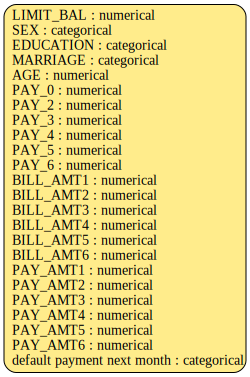

In [14]:
metadata.visualize()

In [15]:
quality_report.get_details('Column Shapes')

,Column,Metric,Score
0,LIMIT_BAL,KSComplement,0.886867
1,SEX,TVComplement,0.922900
2,EDUCATION,TVComplement,0.906833
3,MARRIAGE,TVComplement,0.877167
4,AGE,KSComplement,0.903800
5,PAY_0,KSComplement,0.980267
6,PAY_2,KSComplement,0.983833
7,PAY_3,KSComplement,0.973267
8,PAY_4,KSComplement,0.957333
9,PAY_5,KSComplement,0.961133


In [16]:
fig = quality_report.get_visualization(property_name='Column Pair Trends')
fig.show()

In [22]:
import sdv

for col in num_attrs:
  quality_report = sdv.evaluation.single_table.evaluate_quality(train, synthetic_data, metadata)
  fig = sdv.evaluation.single_table.get_column_plot(
      real_data=train,
      synthetic_data=synthetic_data,
      metadata=metadata,
      column_name=col
  )

  fig.show()

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 24/24 [00:00<00:00, 61.87it/s]|
Column Shapes Score: 91.21%

(2/2) Evaluating Column Pair Trends: |██████████| 276/276 [00:02<00:00, 137.57it/s]|
Column Pair Trends Score: 86.74%

Overall Score (Average): 88.97%



Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 24/24 [00:00<00:00, 60.85it/s]|
Column Shapes Score: 91.21%

(2/2) Evaluating Column Pair Trends: |██████████| 276/276 [00:02<00:00, 137.32it/s]|
Column Pair Trends Score: 86.74%

Overall Score (Average): 88.97%



Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 24/24 [00:00<00:00, 44.38it/s]|
Column Shapes Score: 91.21%

(2/2) Evaluating Column Pair Trends: |██████████| 276/276 [00:02<00:00, 103.57it/s]|
Column Pair Trends Score: 86.74%

Overall Score (Average): 88.97%



Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 24/24 [00:00<00:00, 58.39it/s]|
Column Shapes Score: 91.21%

(2/2) Evaluating Column Pair Trends: |██████████| 276/276 [00:02<00:00, 137.01it/s]|
Column Pair Trends Score: 86.74%

Overall Score (Average): 88.97%



Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 24/24 [00:00<00:00, 58.38it/s]|
Column Shapes Score: 91.21%

(2/2) Evaluating Column Pair Trends: |██████████| 276/276 [00:02<00:00, 135.55it/s]|
Column Pair Trends Score: 86.74%

Overall Score (Average): 88.97%



Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 24/24 [00:00<00:00, 57.10it/s]|
Column Shapes Score: 91.21%

(2/2) Evaluating Column Pair Trends: |██████████| 276/276 [00:02<00:00, 132.57it/s]|
Column Pair Trends Score: 86.74%

Overall Score (Average): 88.97%



Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 24/24 [00:00<00:00, 40.27it/s]|
Column Shapes Score: 91.21%

(2/2) Evaluating Column Pair Trends: |██████████| 276/276 [00:02<00:00, 116.89it/s]|
Column Pair Trends Score: 86.74%

Overall Score (Average): 88.97%



Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 24/24 [00:00<00:00, 56.72it/s]|
Column Shapes Score: 91.21%

(2/2) Evaluating Column Pair Trends: |██████████| 276/276 [00:02<00:00, 131.97it/s]|
Column Pair Trends Score: 86.74%

Overall Score (Average): 88.97%



Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 24/24 [00:00<00:00, 56.27it/s]|
Column Shapes Score: 91.21%

(2/2) Evaluating Column Pair Trends: |██████████| 276/276 [00:02<00:00, 131.45it/s]|
Column Pair Trends Score: 86.74%

Overall Score (Average): 88.97%



Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 24/24 [00:00<00:00, 57.68it/s]|
Column Shapes Score: 91.21%

(2/2) Evaluating Column Pair Trends: |██████████| 276/276 [00:02<00:00, 107.28it/s]|
Column Pair Trends Score: 86.74%

Overall Score (Average): 88.97%



Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 24/24 [00:00<00:00, 56.69it/s]|
Column Shapes Score: 91.21%

(2/2) Evaluating Column Pair Trends: |██████████| 276/276 [00:02<00:00, 133.13it/s]|
Column Pair Trends Score: 86.74%

Overall Score (Average): 88.97%



Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 24/24 [00:00<00:00, 56.70it/s]|
Column Shapes Score: 91.21%

(2/2) Evaluating Column Pair Trends: |██████████| 276/276 [00:02<00:00, 133.78it/s]|
Column Pair Trends Score: 86.74%

Overall Score (Average): 88.97%



Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 24/24 [00:00<00:00, 53.12it/s]|
Column Shapes Score: 91.21%

(2/2) Evaluating Column Pair Trends: |██████████| 276/276 [00:02<00:00, 107.00it/s]|
Column Pair Trends Score: 86.74%

Overall Score (Average): 88.97%



Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 24/24 [00:00<00:00, 37.86it/s]|
Column Shapes Score: 91.21%

(2/2) Evaluating Column Pair Trends: |██████████| 276/276 [00:02<00:00, 107.44it/s]|
Column Pair Trends Score: 86.74%

Overall Score (Average): 88.97%



Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 24/24 [00:00<00:00, 40.50it/s]|
Column Shapes Score: 91.21%

(2/2) Evaluating Column Pair Trends: |██████████| 276/276 [00:04<00:00, 67.33it/s]| 
Column Pair Trends Score: 86.74%

Overall Score (Average): 88.97%



Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 24/24 [00:00<00:00, 51.66it/s]|
Column Shapes Score: 91.21%

(2/2) Evaluating Column Pair Trends: |██████████| 276/276 [00:02<00:00, 127.90it/s]|
Column Pair Trends Score: 86.74%

Overall Score (Average): 88.97%



Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 24/24 [00:01<00:00, 12.73it/s]|
Column Shapes Score: 91.21%

(2/2) Evaluating Column Pair Trends: |██████████| 276/276 [00:06<00:00, 44.65it/s]|
Column Pair Trends Score: 86.74%

Overall Score (Average): 88.97%



Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 24/24 [00:00<00:00, 32.73it/s]|
Column Shapes Score: 91.21%

(2/2) Evaluating Column Pair Trends: |██████████| 276/276 [00:07<00:00, 38.80it/s]|
Column Pair Trends Score: 86.74%

Overall Score (Average): 88.97%



Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 24/24 [00:00<00:00, 53.13it/s]|
Column Shapes Score: 91.21%

(2/2) Evaluating Column Pair Trends: |██████████| 276/276 [00:02<00:00, 130.30it/s]|
Column Pair Trends Score: 86.74%

Overall Score (Average): 88.97%



Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 24/24 [00:00<00:00, 54.74it/s]|
Column Shapes Score: 91.21%

(2/2) Evaluating Column Pair Trends: |██████████| 276/276 [00:02<00:00, 130.56it/s]|
Column Pair Trends Score: 86.74%

Overall Score (Average): 88.97%



Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 24/24 [00:00<00:00, 53.93it/s]|
Column Shapes Score: 91.21%

(2/2) Evaluating Column Pair Trends: |██████████| 276/276 [00:02<00:00, 112.72it/s]|
Column Pair Trends Score: 86.74%

Overall Score (Average): 88.97%



In [23]:
from sdmetrics.single_column import BoundaryAdherence
from sdmetrics.single_column import RangeCoverage

for i in num_attrs:
    print(i +  " " +
    str(BoundaryAdherence.compute(
        real_data=train[i],
        synthetic_data=synthetic_data[i]
    ))
       + ", RangeCoverage  " +
          str(RangeCoverage.compute(
              real_data=train[i],
        synthetic_data=synthetic_data[i]
          )) )

LIMIT_BAL 1.0, RangeCoverage  0.8881525252525253
BILL_AMT1 1.0, RangeCoverage  0.6074165708779204
BILL_AMT2 1.0, RangeCoverage  0.7306625744513661
BILL_AMT3 1.0, RangeCoverage  0.3504328924705975
BILL_AMT4 1.0, RangeCoverage  0.6022488992884232
BILL_AMT5 1.0, RangeCoverage  0.5633189721419328
BILL_AMT6 1.0, RangeCoverage  0.43274132057448633
PAY_AMT1 1.0, RangeCoverage  0.15011470410462113
PAY_AMT2 1.0, RangeCoverage  0.10573314436793868
PAY_AMT3 1.0, RangeCoverage  0.15765144413195842
PAY_AMT4 1.0, RangeCoverage  0.19701771336553942
PAY_AMT5 1.0, RangeCoverage  0.2680286686251111
PAY_AMT6 1.0, RangeCoverage  0.44069979911702284
EDUCATION 1.0, RangeCoverage  1.0
AGE 1.0, RangeCoverage  1.0
PAY_0 1.0, RangeCoverage  0.5
PAY_2 1.0, RangeCoverage  0.5
PAY_3 1.0, RangeCoverage  0.5
PAY_4 1.0, RangeCoverage  0.5
PAY_5 1.0, RangeCoverage  0.5
PAY_6 1.0, RangeCoverage  0.5


In [24]:
from sdmetrics.single_column import CategoryAdherence
from sdmetrics.single_column import CategoryCoverage

for i in cat_attrs:
    print(i +  " CategoryAdherence" +
    str(CategoryAdherence.compute(
        real_data=train[i],
        synthetic_data=synthetic_data[i]
    ))
    + ", CategoryCoverage : " + str(CategoryCoverage.compute(
        real_data=train[i],
        synthetic_data=synthetic_data[i]
    )))


SEX CategoryAdherence1.0, CategoryCoverage : 1.0
MARRIAGE CategoryAdherence1.0, CategoryCoverage : 1.0
default payment next month CategoryAdherence1.0, CategoryCoverage : 1.0


In [25]:
from sklearn.model_selection import train_test_split

train_, test = train_test_split(train, test_size=0.3, random_state=42)

In [26]:
'''
Compute Utility Score
'''

from sdmetrics.single_table import  BinaryDecisionTreeClassifier

synthetic_data_f1 = BinaryDecisionTreeClassifier.compute(
    test_data=test,
    train_data=synthetic_data,
    target='default payment next month',
    metadata=metadata.to_dict()
)

real_data_f1 = BinaryDecisionTreeClassifier.compute(
    test_data=test,
    train_data=train_,
    target='default payment next month',
    metadata=metadata.to_dict()
)

print(f'Utility Score: {min(synthetic_data_f1/real_data_f1 , 1)}')

Utility Score: 0.9149951517597932


In [27]:
from sdmetrics.single_table import DCRBaselineProtection

privacy = DCRBaselineProtection.compute_breakdown(
    real_data=train,
    synthetic_data=synthetic_data,
    metadata=metadata.to_dict(),
    num_rows_subsample = 100,
    num_iterations =50
)
print(f'Privacy Score: {privacy["score"]}')

Privacy Score: 0.12836853296436798


In [28]:
from sdmetrics.single_table import NewRowSynthesis

NewRowSynthesis.compute(
    real_data=train,
    synthetic_data=synthetic_data,
    metadata=metadata.to_dict(),
    numerical_match_tolerance=0.01,
    synthetic_sample_size=3000
)

1.0

In [ ]:
synthetic_data.to_csv('ctgan_synthetic.csv')

In [ ]:
import pickle

with open('ctgan_model.pkl', 'wb') as f:
  pickle.dump(synthesizer, f)